In [1]:
#  requires 'astro' conda environment (on deneb)
#loading a light curve from the aavso from the database
# recommend - no discrepant data (judged to be outliners), no diff and step data and csv files.
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.time import Time
import lightkurve as lk
import os
from Pyriod import Pyriod

In [2]:
def plot_lightcurve(data_JD, data_mag, JDmin, JDmax):
    plt.scatter(data_JD, data_mag, marker='.')
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])
    plt.show()    

['JD', 'Magnitude', 'Uncertainty', 'HQuncertainty', 'Band', 'Observer Code', 'Comment Code(s)', 'Comp Star 1', 'Comp Star 2', 'Charts', 'Comments', 'Transfomed', 'Airmass', 'Validation Flag', 'Cmag', 'Kmag', 'HJD', 'Star Name', 'Observer Affiliation', 'Measurement Method', 'Grouping Method', 'ADS Reference', 'Digitizer', 'Credit']
[1366, 1934, 1952, 2188, 2189, 2194, 2199, 2201, 2243, 2244, 2327, 2330, 2805, 2827, 2832, 2839, 2844, 2846, 2858, 3344, 5031, 5529, 5793, 5983, 5993, 7578, 8202, 8265, 14965, 20664, 20866, 27540]


/tmp/ipykernel_11631/1710055340.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])


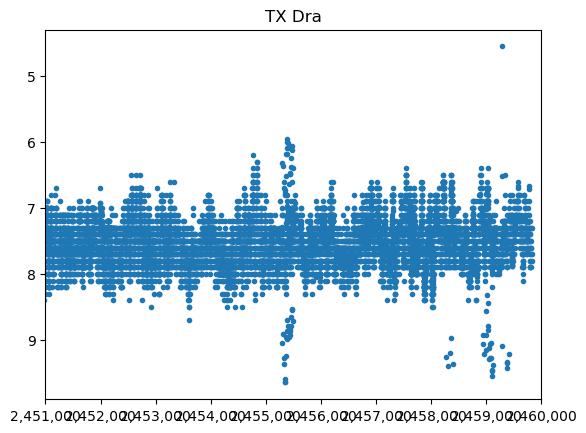

In [3]:
# from first aavso tutorial (sept 2022), loading aavso csv data using lightkurve
data_dir = '/home/john/astro/variable_star_data'
#lightcurve_file = 'aavsodata_v1405cas_20220903.csv'
lightcurve_file = 'aavsodata_txdra_20220904.csv'
lightcurve_path = os.path.join(data_dir, lightcurve_file)
#chart_title = 'V1405 Cas'
chart_title = 'TX Dra'

data = Table.read(lightcurve_path, encoding='UTF-8')
print(data.colnames)

#watch out - Magnitude gets interpreted as TEXT due to the 'fainter thans'
rows_to_remove = []
for observation in data:
    #print(observation['Star Name'])
    if '<' in observation['Magnitude']:
        rows_to_remove.append(observation.index)
# remove rows with text
print(rows_to_remove)
data.remove_rows(rows_to_remove)

data['Magnitude'] = [float(mag) for mag in data['Magnitude']]

plot_lightcurve(data['JD'], data['Magnitude'], 2451000, 2460000)

In [4]:
# from second aavso python session.  Analyse with Pyriod
time = data["JD"]
mag = data["Magnitude"]
mag2 = 10.0**(-0.4*data["Magnitude"]) # fails, ?cos of non-floats
# need to reduce the data size (memory problems)
# can only analyse <200 datapoints before run out of memory on deneb
time = time[-150:-1]
mag3 = mag2[-150:-1]

/tmp/ipykernel_11631/1710055340.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])


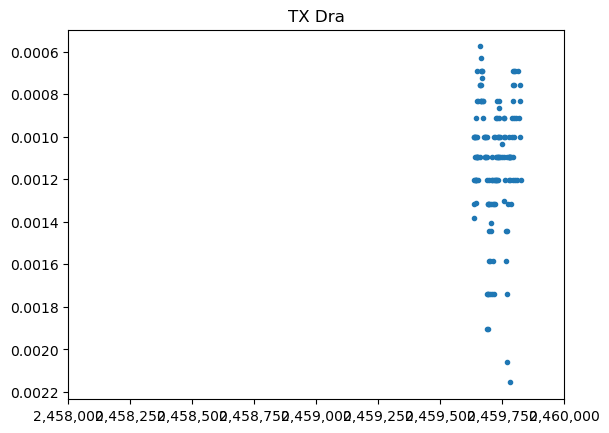

In [5]:
plot_lightcurve(time, mag3, 2458000, 2460000)

In [6]:
lc = lk.LightCurve(time=time,flux=mag3).normalize()

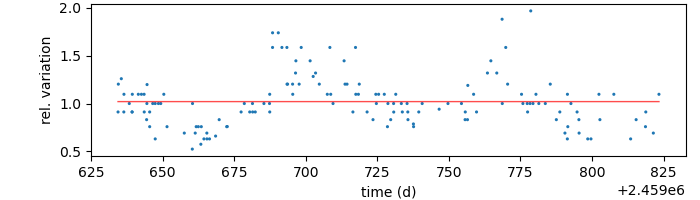

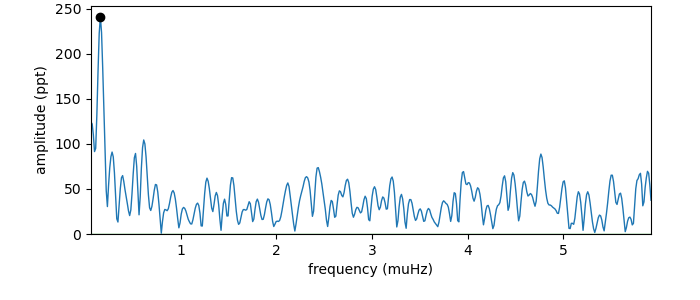

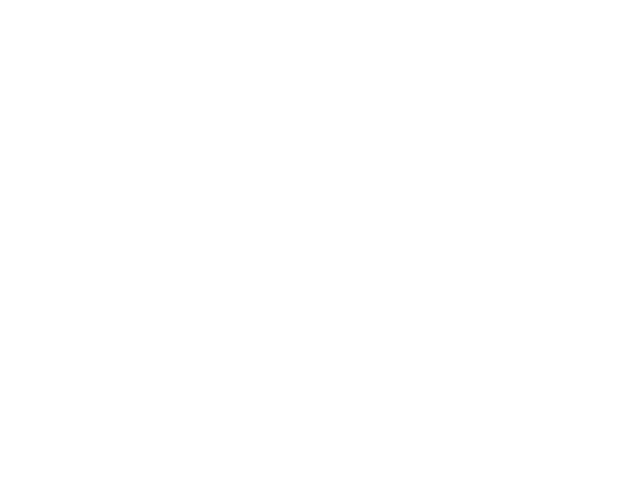

In [7]:
%matplotlib widget
pyr = Pyriod(lc)

In [8]:
pyr.Pyriod()